<a href="https://colab.research.google.com/github/myusuf1982/Prediksi-Saham/blob/main/Tinggal_hubungan_in_dan_out_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from keras.layers import Input, LSTM, Concatenate, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# data preparation
raw_data = pd.read_csv("/content/drive/My Drive/GOOG-year.csv")
#raw_data =raw_data[:50] # Juml row maksimal yang mau diambil sample 15 row

# memilih kolom open dan close saja
raw_data = raw_data[['Open', 'Close','High','Low','Adj Close']] # all = Tanggal,Open,High,Low,Close,Adj Close,Volume
raw_data.head()

,Open,Close,High,Low,Adj Close
0,778.200012,768.700012,781.650024,763.450012,768.700012
1,767.250000,762.130005,769.950012,759.030029,762.130005
2,750.659973,762.020020,770.359985,750.560974,762.020020
3,774.500000,782.520020,785.190002,772.549988,782.520020
4,783.400024,790.510010,795.632996,780.190002,790.510010


In [29]:
data = raw_data[['Open']]
scaler = MinMaxScaler(feature_range=(0, 1))
open = scaler.fit_transform(data)

data = raw_data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
close = scaler.fit_transform(data)

data = raw_data[['High']]
scaler = MinMaxScaler(feature_range=(0, 1))
high = scaler.fit_transform(data)

data = raw_data[['Low']]
scaler = MinMaxScaler(feature_range=(0, 1))
low = scaler.fit_transform(data)

data = raw_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
adj = scaler.fit_transform(data)



In [30]:
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(len(raw_data) * 0.5) #226 total 252

#Dataset training data 90%
train_data1 = open[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
open = original_array.ravel()   

#Dataset training data 90%
train_data1 = close[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
close = original_array.ravel()   

#Dataset training data 90%
train_data1 = high[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
high = original_array.ravel()   

#Dataset training data 90%
train_data1 = low[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
low = original_array.ravel()   

#Dataset training data 90%
train_data1 = adj[:train_size] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data1) #trainX & trainY
adj = original_array.ravel()   

#Dataset test data 10%
#test_data = close[train_size:] # 90% = 226 -252 = 26  /Train 90%
#original_array1=np.array(test_data) #trainX & trainY
#open_test = original_array1.ravel()   


#reshape data ke 3D
open_data = open.reshape((len(open), 1,1))
close_data = close.reshape((len(close),1, 1))
high_data = high.reshape((len(high), 1,1))
low_data = low.reshape((len(low), 1,1))
volume_data = adj.reshape((len(adj),1, 1))

#Data untuk compare hasil training dan sebelum training
open_data_sblum_training = open_data

In [31]:
#input layer / Setting variable jadi 3 dimensi
open_in = Input(shape=(1,1))
close_in = Input(shape=(1,1))
high_in = Input(shape=(1,1))
low_in = Input(shape=(1,1))
volume_in = Input(shape=(1,1))

#LSTM layer
open_lstm = LSTM(50)(open_in)
close_lstm = LSTM(50)(close_in)
high_lstm = LSTM(50)(high_in)
low_lstm = LSTM(50)(low_in)
volume_lstm = LSTM(50)(volume_in)

In [32]:
#concatenate layer
merged = Concatenate()([open_lstm, close_lstm, high_lstm, low_lstm, volume_lstm])

#output layer
output = Dense(1)(merged)

#model
model = Model([open_in, close_in, high_in, low_in, volume_in], output)
model.compile(loss='mean_absolute_error', optimizer='adam')

#fit model
model.fit([open_data, close_data, high_data, low_data, volume_data], open_data, epochs=1000, batch_size=32)
#model.fit([open_data, close_data, high_data, low_data, volume_data], data['Next_Close'], epochs=5, batch_size=32) # buatkan datanya

Epoch 1/1000
4/4 [==============================] - 10s 9ms/step - loss: 0.2416
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2087
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1774
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1485
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1219
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.1006
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0830
Epoch 8/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0747
Epoch 9/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0719
Epoch 10/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0727
Epoch 11/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.0717
Epoch 12/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0683
Epoch 13/1000
4/4 [========================

4/4 [==============================] - 2s 4ms/step - loss: 5.1311e-04
Absolute Mean Error:  0.0005131083307787776


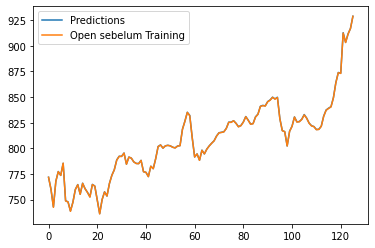

In [33]:
#predict data dari hasil training
predictions = model.predict([open_data, close_data, high_data, low_data, volume_data])

#evaluate
error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], open_data)   #error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], data['Close'])
print("Absolute Mean Error: ", error)
#train_data1=train_data

# inverting data kembali ke nilai asli
predictions = scaler.inverse_transform(predictions) #2D
train_data= open_data_sblum_training.reshape(-1, 1) #ubah ke 2D
open_data_sblum_training   = scaler.inverse_transform(train_data) # cuma sekali presiksi saja karean bisa ke scaller 2 x

#test_data   = scaler.inverse_transform(test_data)
#testPredict = scaler.inverse_transform(testPredict)                       
#testY = scaler.inverse_transform(testY)     

#plot
plt.plot(predictions, label='Predictions')
#plt.plot(data['Next_Close'], label='Actual')
#plt.plot(new_array1, label='Actual') # buatkan datanya
plt.plot(open_data_sblum_training, label='Open sebelum Training') # buatkan datanya

plt.legend()
plt.show()

8/8 [==============================] - 0s 4ms/step - loss: 0.0012
Absolute Mean Error:  0.0011915666982531548


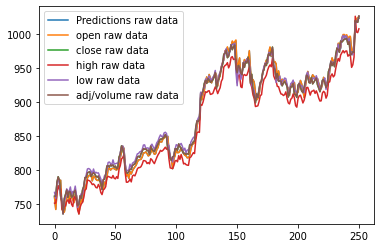

In [34]:

#predict data dari BUKAN hasil training
# membuat dataset dengan 90% data training dan 10% data testing
train_size = int(1 * 1) #226 total 252 # sudah di atas
data = raw_data[['Open']]
scaler = MinMaxScaler(feature_range=(0, 1))
open = scaler.fit_transform(data)

data = raw_data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
close = scaler.fit_transform(data)

data = raw_data[['High']]
scaler = MinMaxScaler(feature_range=(0, 1))
high = scaler.fit_transform(data)

data = raw_data[['Low']]
scaler = MinMaxScaler(feature_range=(0, 1))
low = scaler.fit_transform(data)

data = raw_data[['Adj Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
adj = scaler.fit_transform(data)


#Dataset training data 10%
train_data = open[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
open = original_array.ravel()   

#Dataset training data 10%
train_data = close[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
close = original_array.ravel()   

#Dataset training data 10%
train_data = high[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
high = original_array.ravel()   

#Dataset training data 10%
train_data = low[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
low = original_array.ravel()   

#Dataset training data 10%
train_data = adj[train_size:] # 90% = 226 -252 = 26  /Train 90%
original_array=np.array(train_data) #trainX & trainY
adj = original_array.ravel()   


#reshape data ke 3D
open_data_aktual = open.reshape((len(open), 1,1))
close_data_aktual = close.reshape((len(close),1, 1))
high_data_aktual = high.reshape((len(high), 1,1))
low_data_aktual = low.reshape((len(low), 1,1))
volume_data_aktual = adj.reshape((len(adj),1, 1))

#Predict data belum pernah training 
#model.compile(loss='mean_absolute_error', optimizer='adam')
predictions = model.predict([open_data_aktual, close_data_aktual, high_data_aktual, low_data_aktual, volume_data_aktual])

#evaluate
error = model.evaluate([open_data_aktual, close_data_aktual, high_data_aktual, low_data_aktual, volume_data_aktual], open_data_aktual)   #error = model.evaluate([open_data, close_data, high_data, low_data, volume_data], data['Close'])
print("Absolute Mean Error: ", error)
#train_data1=train_data

# inverting data kembali ke nilai asli
predictions = scaler.inverse_transform(predictions) #2D

#percobaan pembanding
a   =open.reshape(-1, 1) #ubah ke 2D
open   = scaler.inverse_transform(a) # cuma sekali presiksi saja karean bisa ke scaller 2 x

b   =close.reshape(-1, 1) #ubah ke 2D
close   = scaler.inverse_transform(b) # cuma sekali presiksi saja karean bisa ke scaller 2 x

c   =high.reshape(-1, 1) #ubah ke 2D
high   = scaler.inverse_transform(c) # cuma sekali presiksi saja karean bisa ke scaller 2 x

d   =low.reshape(-1, 1) #ubah ke 2D
low   = scaler.inverse_transform(d) # cuma sekali presiksi saja karean bisa ke scaller 2 x

e   =adj.reshape(-1, 1) #ubah ke 2D
adi   = scaler.inverse_transform(e) # cuma sekali presiksi saja karean bisa ke scaller 2 x

f   =adj.reshape(-1, 1) #ubah ke 2D
adj   = scaler.inverse_transform(f) # cuma sekali presiksi saja karean bisa ke scaller 2 x



#test_data   = scaler.inverse_transform(test_data)
#testPredict = scaler.inverse_transform(testPredict)                       
#testY = scaler.inverse_transform(testY)     

#plot
plt.plot(predictions, label='Predictions raw data')
plt.plot(open, label='open raw data')
plt.plot(close, label='close raw data')
plt.plot(high, label='high raw data')
plt.plot(low, label='low raw data')
plt.plot(adj, label='adj/volume raw data')

plt.legend()
plt.show()